Importance du prétraitement des données

In [2]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Shape de l'image :  (394, 355)


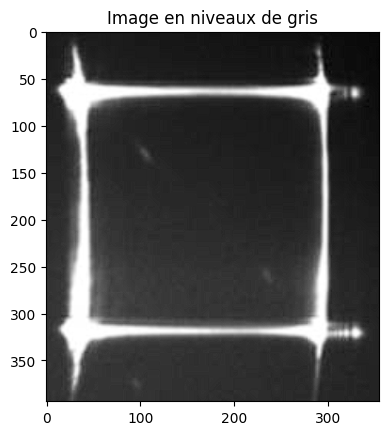

In [7]:
# Charger l'image en niveaux de gris
image = cv2.imread('data.png', cv2.IMREAD_GRAYSCALE)

# Vérifier la forme de l'image
print("Shape de l'image : ", image.shape)

# Afficher l'image
plt.imshow(image, cmap='gray')
plt.title('Image en niveaux de gris')
plt.show()

Shape de l'image avant :  (394, 355)
Shape des données après :  (139870,)


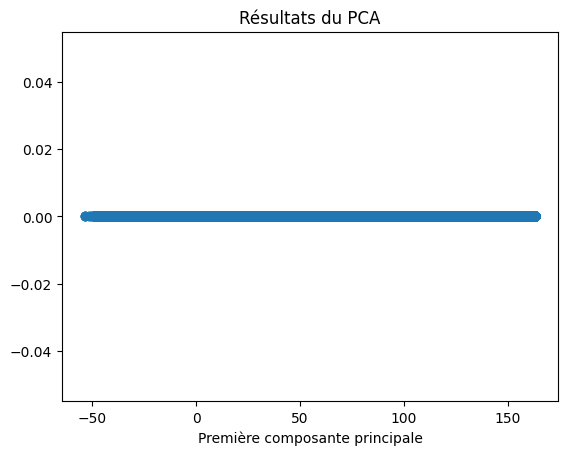

In [6]:
# Charger l'image
image = cv2.imread('data.png', cv2.IMREAD_GRAYSCALE)

# Vérifier la forme de l'image
print("Shape de l'image avant : ", image.shape)

# Aplatir l'image en un tableau unidimensionnel
data = image.flatten()

# Vérifier la forme des données après aplatir
print("Shape des données après : ", data.shape)

# Créer une instance de PCA
pca = PCA(n_components=1)  # Vous pouvez ajuster le nombre de composantes principales selon vos besoins

# Appliquer le PCA aux données
pca_result = pca.fit_transform(data.reshape(-1, 1))

# Visualisation des résultats avec une seule composante principale
plt.scatter(pca_result[:, 0], np.zeros_like(pca_result[:, 0]))  # Utilisez seulement la première composante
plt.title('Résultats du PCA')
plt.xlabel('Première composante principale')
plt.show()


Je ne peux exploiter plus l'image brillouin, car je n'ai pas de différence significative entre les milieux . 

### Données fake 

Scénario avec un plexiglas immergé dans de l'eau déionisée :

Je vais supposer que le plexiglas a une fréquence Brillouin plus élevée que l'eau déionisée.
Les valeurs de fréquence Brillouin pour le plexiglas seront concentrées autour d'une valeur plus élevée.


Scénario avec un sphéroïde d'hydrogel dans l'eau :

Je vais supposer que l'hydrogel a une fréquence Brillouin différente de celle de l'eau.
Les valeurs de fréquence Brillouin pour l'hydrogel seront concentrées autour d'une valeur différente de celle de l'eau.

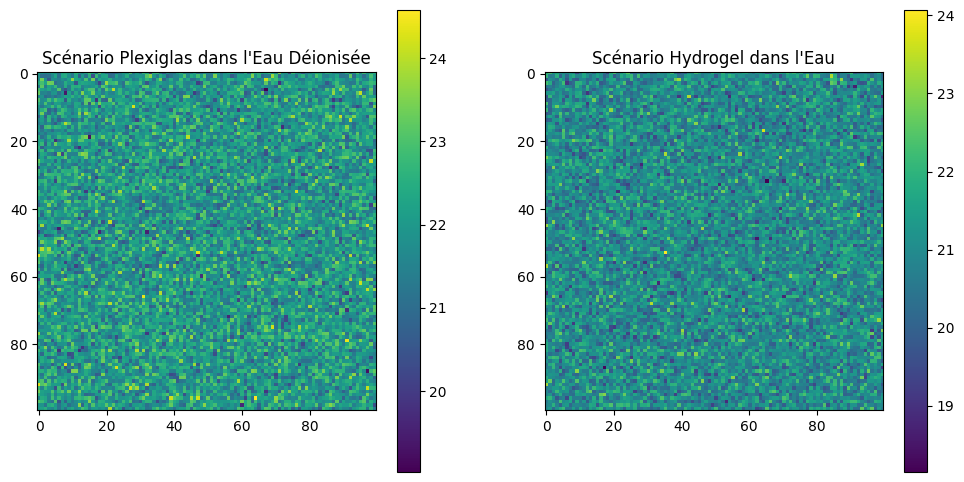

In [13]:
# Définir les paramètres des scénarios
plexiglas_frequency = 12.0  # Fréquence Brillouin du plexiglas
water_frequency = 10.0     # Fréquence Brillouin de l'eau
hydrogel_frequency = 11.0  # Fréquence Brillouin de l'hydrogel

# Dimensions de l'image (par exemple, 100x100 pixels)
image_shape = (100, 100)

# Générer les données pour le scénario avec le plexiglas immergé dans de l'eau déionisée
data_plexiglas_water = np.random.normal(plexiglas_frequency, 0.5, size=image_shape)
data_plexiglas_water += np.random.normal(water_frequency, 0.5, size=image_shape)

# Générer les données pour le scénario avec le sphéroïde d'hydrogel dans l'eau
data_water_hydrogel = np.random.normal(hydrogel_frequency, 0.5, size=image_shape)
data_water_hydrogel += np.random.normal(water_frequency, 0.5, size=image_shape)

# Afficher les données côte à côte
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data_plexiglas_water, cmap='viridis')
plt.title('Scénario Plexiglas dans l\'Eau Déionisée')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_water_hydrogel, cmap='viridis')
plt.title('Scénario Hydrogel dans l\'Eau')
plt.colorbar()

plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

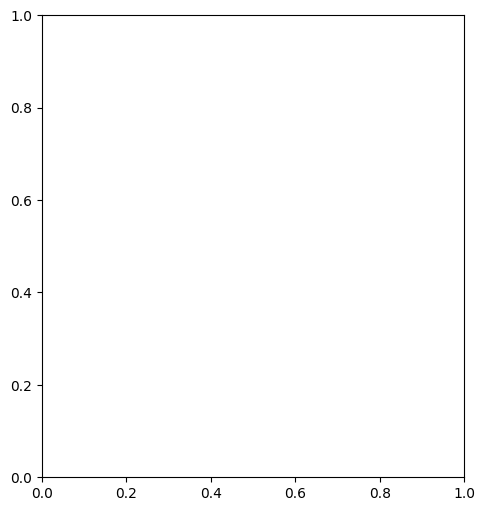

In [15]:

# Appliquer le PCA aux données du scénario Plexiglas dans l'Eau Déionisée
pca_plexiglas_water = PCA(n_components=1)
pca_result_plexiglas_water = pca_plexiglas_water.fit_transform(data_plexiglas_water.reshape(-1, 1))

# Appliquer le PCA aux données du scénario Hydrogel dans l'Eau
pca_water_hydrogel = PCA(n_components=1)
pca_result_water_hydrogel = pca_water_hydrogel.fit_transform(data_water_hydrogel.reshape(-1, 1))


# Visualiser les résultats du PCA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result_plexiglas_water[:, 0], pca_result_plexiglas_water[:, 1])
plt.title('PCA - Plexiglas dans l\'Eau Déionisée')

plt.subplot(1, 2, 2)
plt.scatter(pca_result_water_hydrogel[:, 0], pca_result_water_hydrogel[:, 1])
plt.title('PCA - Hydrogel dans l\'Eau')

plt.show()

En microscopie Brillouin, chaque pixel de l'image représente une mesure de la fréquence Brillouin à un emplacement spécifique de l'échantillon. Par conséquent, si votre image a une résolution de, par exemple, 100x100 pixels, vous aurez 10 000 valeurs de fréquence Brillouin, ce qui se traduit par un grand nombre de caractéristiques (features) à analyser.

Dans le contexte du PCA, cela signifie que vous pourriez envisager de réduire la dimensionnalité de vos données en appliquant le PCA à l'ensemble de l'image, plutôt qu'à chaque pixel individuellement. Cela pourrait vous fournir une représentation plus compacte des variations globales de fréquence Brillouin dans l'échantillon.

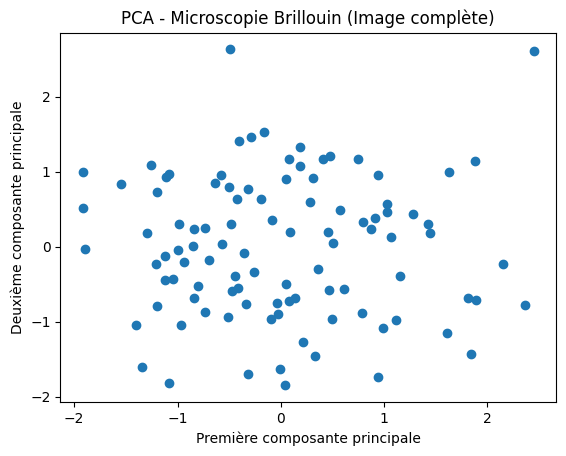

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Générer des données d'exemple pour une image 100x100
image_shape = (100, 100)
data_brillouin = np.random.normal(loc=11.0, scale=0.5, size=image_shape)

# Appliquer le PCA à l'ensemble de l'image
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_brillouin)

# Visualiser les résultats du PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA - Microscopie Brillouin (Image complète)')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()
